In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter 
import scipy
from matplotlib import cm as CM
%matplotlib inline

In [2]:
root = '../shanghaitech'
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')

path_sets = [part_A_train,part_A_test]

In [3]:
path_sets

['../shanghaitech/part_A_final/train_data/images',
 '../shanghaitech/part_A_final/test_data/images']

In [7]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [8]:
img_paths

['../shanghaitech/part_A_final/train_data/images/IMG_10.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_38.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_117.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_103.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_249.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_1.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_261.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_275.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_274.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_260.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_248.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_102.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_116.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_39.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_11.jpg',
 '../shanghaitech/part_A_final/train_data/images/IMG_300.jpg'

In [41]:
img = plt.imread(img_paths[0])

In [45]:
img.shape[0]

683

In [46]:
mat = io.loadmat(img_paths[0].replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))

In [63]:
mat["image_info"][0,0][0,0][0][0]

array([855.32345978, 590.49587357])

In [54]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [96]:
mat = io.loadmat(img_paths[0].replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
img = plt.imread(img_paths[0])

k = np.zeros((img.shape[0],img.shape[1])) # 创建一个与原图大小相同的k矩阵
gt = mat["image_info"][0,0][0,0][0]

for i in range(0,len(gt)):
    if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
        k[int(gt[i][1]),int(gt[i][0])]=1    # 人头处标为1

k = gaussian_filter_density(k)
        

(683, 1024)
generate density...
done.


In [99]:
np.sum(k)

904.1688

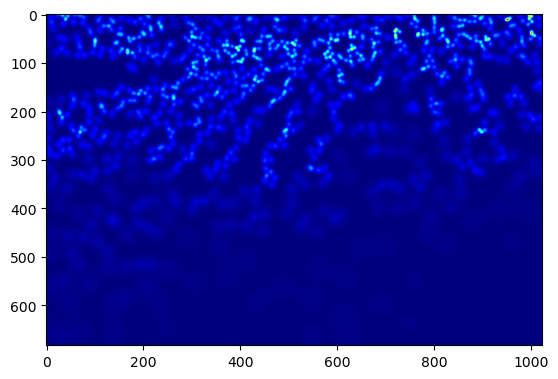

In [100]:
plt.imshow(k,cmap=CM.jet)